# Stock Price Prediction For Random Forest

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

## Loading The Data

In [2]:
df =pd.read_csv('infy.csv')
df.info()# To Get some information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4093 entries, 0 to 4092
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4093 non-null   object 
 1   Open Price                 4093 non-null   float64
 2   High Price                 4093 non-null   float64
 3   Low Price                  4093 non-null   float64
 4   Close Price                4093 non-null   float64
 5   WAP                        4093 non-null   float64
 6   No.of Shares               4093 non-null   int64  
 7   No. of Trades              4093 non-null   int64  
 8   Total Turnover (Rs.)       4093 non-null   float64
 9   Deliverable Quantity       4092 non-null   float64
 10  % Deli. Qty to Traded Qty  4092 non-null   float64
 11  Spread High-Low            4093 non-null   float64
 12  Spread Close-Open          4093 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

## Data Processing

In [3]:
# Converting the Date column into datetime object of Pandas
df.Date=pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)

In [4]:
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2021-07-02,1562.50,1569.65,1542.30,1567.40,1554.201703,338146,19731,525547089.0,149712.0,44.27,27.35,4.90
2021-07-01,1582.00,1582.00,1559.35,1560.45,1565.122781,280753,18220,439412916.0,124508.0,44.35,22.65,-21.55
2021-06-30,1562.60,1590.85,1562.60,1581.25,1583.431078,172398,8875,272980351.0,65985.0,38.27,28.25,18.65
2021-06-29,1564.85,1573.75,1559.25,1562.60,1564.649763,121752,8355,190499238.0,60602.0,49.77,14.50,-2.25
2021-06-28,1572.00,1580.00,1559.50,1571.55,1570.489806,229454,16107,360355168.0,113270.0,49.36,20.50,-0.45


In [5]:
df.tail()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2005-01-07,2040.0,2064.7,1995.05,2050.90,2022.886785,774616,19031,1.566960e+09,249381.0,32.19,69.65,10.90
2005-01-06,2055.0,2093.0,1994.00,2043.15,2047.939230,485472,13813,9.942172e+08,130589.0,26.90,99.00,-11.85
2005-01-05,2078.0,2078.0,2004.00,2051.85,2045.327812,340183,11286,6.957858e+08,94380.0,27.74,74.00,-26.15
2005-01-04,2120.0,2120.0,2082.25,2088.35,2097.214082,195878,7004,4.107981e+08,72171.0,36.84,37.75,-31.65
2005-01-03,2099.0,2125.0,2095.50,2117.35,2108.165405,103824,5418,2.188782e+08,18022.0,17.36,29.50,18.35


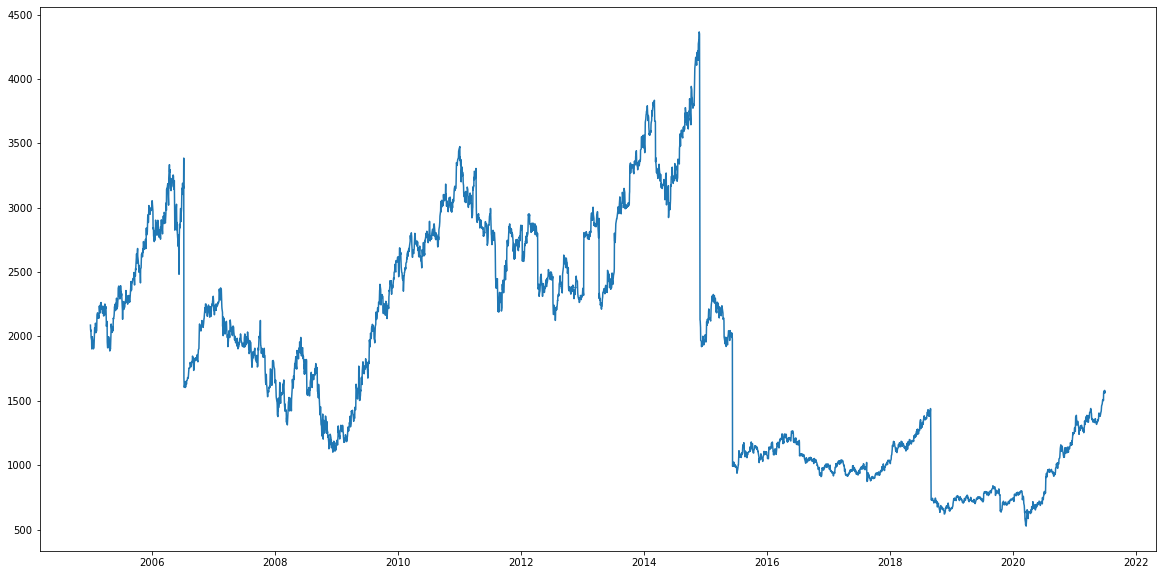

In [6]:
df=df.iloc[::-1]
df['Target']=df['Close Price'].shift(periods=-1)
plt.plot(df.index,df['Target'])

In [7]:
df.shape

(4093, 13)

In [8]:
df_m=df

### Cleaning Data

In [9]:
df_m=df_m.dropna()# To Drop all the rows with NaN values

In [10]:
df_m.shape

(4091, 13)

In [11]:
df.tail()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Target
Date,,,,,,,,,,,,,
2021-06-28,1572.00,1580.00,1559.50,1571.55,1570.489806,229454,16107,360355168.0,113270.0,49.36,20.50,-0.45,1562.60
2021-06-29,1564.85,1573.75,1559.25,1562.60,1564.649763,121752,8355,190499238.0,60602.0,49.77,14.50,-2.25,1581.25
2021-06-30,1562.60,1590.85,1562.60,1581.25,1583.431078,172398,8875,272980351.0,65985.0,38.27,28.25,18.65,1560.45
2021-07-01,1582.00,1582.00,1559.35,1560.45,1565.122781,280753,18220,439412916.0,124508.0,44.35,22.65,-21.55,1567.40
2021-07-02,1562.50,1569.65,1542.30,1567.40,1554.201703,338146,19731,525547089.0,149712.0,44.27,27.35,4.90,NaN


## Splitting the Data

In [12]:
# 30% of the dataset is taken as the test dataset
x_train,x_test,y_train,y_test=train_test_split(df_m.drop(['Target'],axis='columns'),df_m['Target'],test_size=0.3)

## Training the Model

In [13]:
model=RandomForestRegressor(n_estimators=500)

In [14]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

### Accuracy

In [15]:
model.score(x_test,y_test)

0.9942190755206636

In [16]:
df.tail(10)

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Target
Date,,,,,,,,,,,,,
2021-06-21,1489.00,1505.70,1484.10,1500.35,1497.266676,292535,13826,4.380029e+08,155696.0,53.22,21.60,11.35,1511.70
2021-06-22,1510.00,1520.65,1501.00,1511.70,1510.116605,390010,14889,5.889606e+08,274906.0,70.49,19.65,1.70,1502.85
2021-06-23,1523.00,1524.95,1498.60,1502.85,1511.341270,1596028,7531,2.412143e+09,1492600.0,93.52,26.35,-20.15,1559.15
2021-06-24,1516.00,1568.35,1511.90,1559.15,1543.531866,441203,18504,6.810109e+08,117099.0,26.54,56.45,43.15,1574.45
2021-06-25,1570.00,1578.20,1543.75,1574.45,1565.055530,281577,15098,4.406836e+08,111044.0,39.44,34.45,4.45,1571.55
2021-06-28,1572.00,1580.00,1559.50,1571.55,1570.489806,229454,16107,3.603552e+08,113270.0,49.36,20.50,-0.45,1562.60
2021-06-29,1564.85,1573.75,1559.25,1562.60,1564.649763,121752,8355,1.904992e+08,60602.0,49.77,14.50,-2.25,1581.25
2021-06-30,1562.60,1590.85,1562.60,1581.25,1583.431078,172398,8875,2.729804e+08,65985.0,38.27,28.25,18.65,1560.45
2021-07-01,1582.00,1582.00,1559.35,1560.45,1565.122781,280753,18220,4.394129e+08,124508.0,44.35,22.65,-21.55,1567.40


In [17]:
pred_y=model.predict(x_test)

## Evaluvation And Visualisation

In [18]:
#Root Mean Sqaured Error
mean_squared_error(y_test,pred_y,squared=False)

64.70682809335419

In [19]:
#Squared Error
mean_squared_error(y_test,pred_y)

4186.973601902891

In [20]:
# Mean_Absolute Error
mean_absolute_error(y_test,pred_y)

29.13902198697071

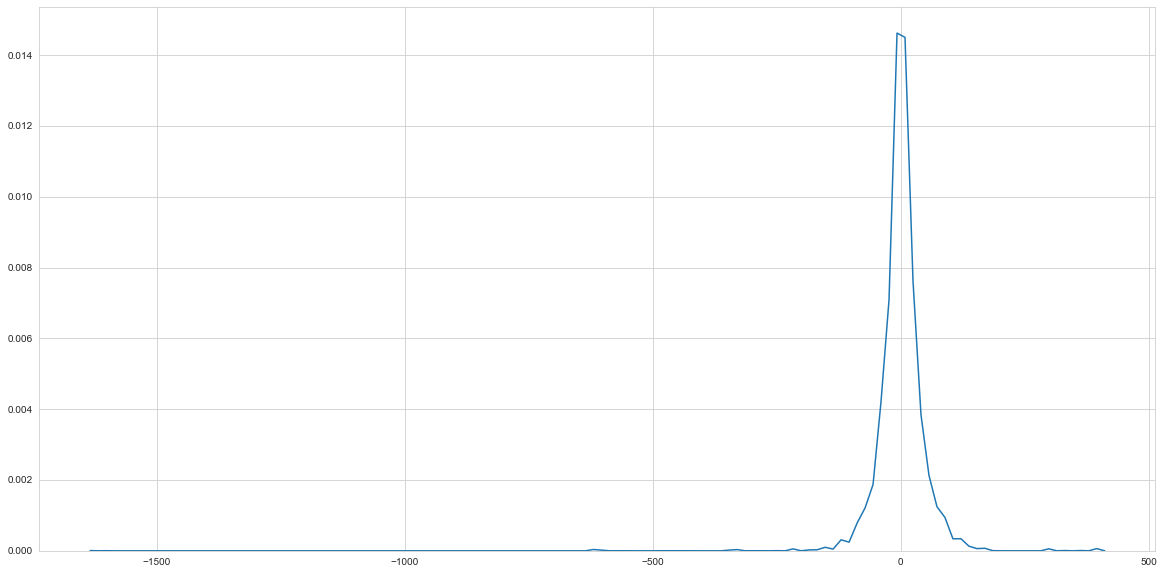

In [21]:
delta_y = y_test-pred_y;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=5)
plt.show()

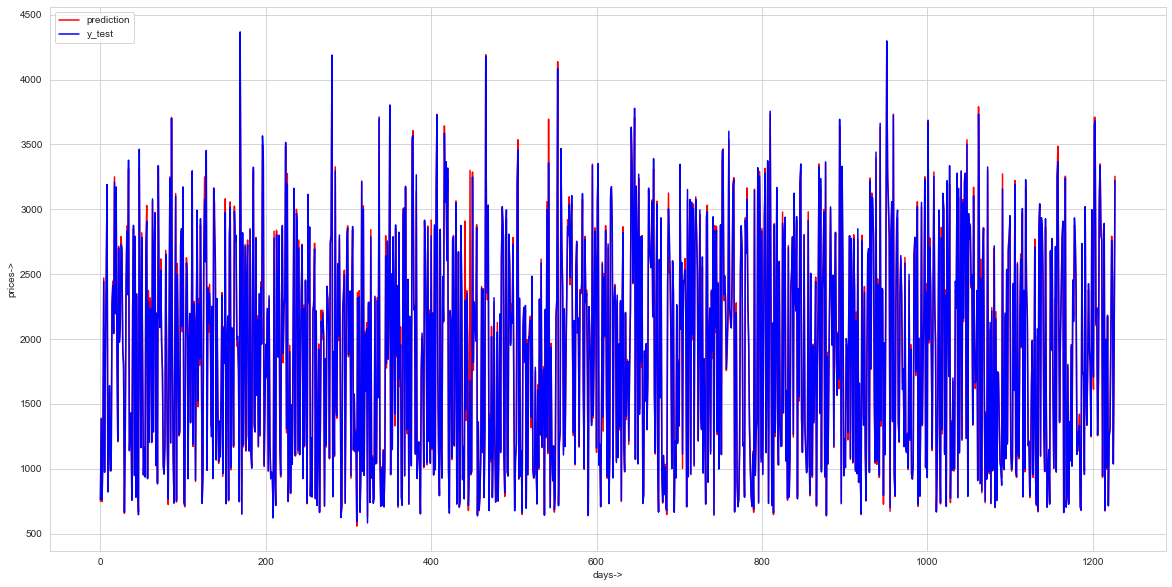

In [22]:
plt.plot(pred_y,color='red', label='prediction')
plt.plot(list(y_test),color='blue', label='y_test')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.legend(loc='upper left')
plt.show()

<BarContainer object of 2 artists>

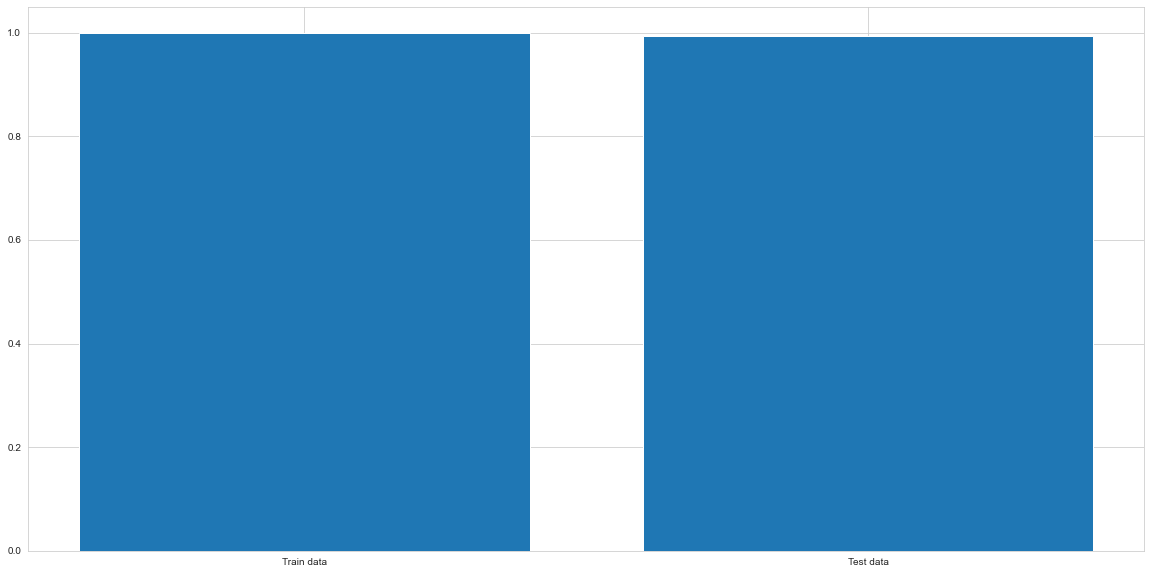

In [23]:
s_train=model.score(x_train,y_train)
s_test=model.score(x_test,y_test)
train_e=mean_squared_error(y_train,model.predict(x_train),squared=False)
test_e=mean_squared_error(y_test,pred_y,squared=False)
plt.bar(('Train data','Test data'),(s_train,s_test))

In [24]:
#Real Time Prediction
model.predict([[2205.90,2241.80,2184.60,2227.30,2215.96,615525,36724,1363979932,233667,37.96,57.20,21.40]])

array([2205.0769])